<a href="https://www.kaggle.com/code/aneevinay/experience-regression-with-price-of-drone?scriptVersionId=264131437" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

> This Data Science project aims to predict the actual price by comparing different drone models. The dataset contains various drone models, their specifications, and their actual prices (including discounts). This project involves preprocessing the datasets and applying machine learning models .Since the dataset is relatively small, the model’s accuracy may be limited. This handas on project help beginners to understand the E-commerce data analysis ,feature extraction and regression methods ,prepairing them for real world challenges in data science

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
df=pd.read_csv('/kaggle/input/flipkart-e-commerce-drone-dataset/flipkart_drone.csv')

# Check the data

In [3]:
df.shape

(821, 8)

## Glimpse the Data

In [4]:
df.head()

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",Mini Drone,40,Lithium Battery,200,2297.0,4999.0,54.0
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,Mini Drone,300,AA Battery,500,10255.0,11000.0,6.0
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,Professional Drone,102,AA Rechargeable Battery,150,1994.0,5999.0,66.0
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,Mini Drone,50,Lithium Battery,150,2455.0,4999.0,50.0
4,Orivox M3 Max Mini Drone with Pro Features HD ...,Mini Drone,200,Lithium Battery,200,4998.0,5999.0,16.0


In [5]:
df.describe()

,Control Range,Weight,Price,Actual Price,Discount (%)
count,821.000000,821.000000,813.000000,813.000000,810.000000
mean,97.193666,3497.157125,2981.785978,8719.712177,63.897531
std,352.827955,38551.303866,1624.738407,2931.414147,13.395685
min,0.000000,0.000000,630.000000,1000.000000,4.000000
25%,60.000000,230.000000,2447.000000,6999.000000,59.000000
50%,65.000000,250.000000,2705.000000,8999.000000,69.000000
75%,100.000000,330.000000,2705.000000,8999.000000,70.000000
max,10028.000000,780000.000000,19999.000000,29999.000000,89.000000


The dataset contains long range drones to nearby ones.

# Check Missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           821 non-null    object 
 1   Type           821 non-null    object 
 2   Control Range  821 non-null    int64  
 3   Battery Type   821 non-null    object 
 4   Weight         821 non-null    int64  
 5   Price          813 non-null    float64
 6   Actual Price   813 non-null    float64
 7   Discount (%)   810 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
df.duplicated().sum()

3

> The Dataset contain 3 duplicated values and we want to heck is it really data entry mistake or another entry with same name.

In [8]:
df[df.duplicated()]

,Name,Type,Control Range,Battery Type,Weight,Price,Actual Price,Discount (%)
478,Swa Mi E88 Pro Foldable Remote Control Drone D...,Professional Drone,100,Lithium Battery,100,2705.0,8999.0,69.0
609,Swa Mi Mini dron with Camera Hd Dual Camera Wi...,Professional Drone,100,Lithium Battery,100,2244.0,8999.0,75.0
630,"Swa Mi High Quality E88 Pro Drone HD, Dual Cam...",Professional Drone,100,Lithium Battery,100,2705.0,8999.0,69.0


we cannot count this as duplicates

In [9]:
df.isnull().sum()

Name              0
Type              0
Control Range     0
Battery Type      0
Weight            0
Price             8
Actual Price      8
Discount (%)     11
dtype: int64

The Dataset contains 8 missing values in actual price . In this project my aim is to calculate actual price .so the rows which doesn't contain actual price doesn't have any relvence in the model.So it is better to drop them

In [10]:
df = df.dropna(subset=["Actual Price"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 820
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           813 non-null    object 
 1   Type           813 non-null    object 
 2   Control Range  813 non-null    int64  
 3   Battery Type   813 non-null    object 
 4   Weight         813 non-null    int64  
 5   Price          813 non-null    float64
 6   Actual Price   813 non-null    float64
 7   Discount (%)   810 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 57.2+ KB


we can calculate 2 missing discount values in percentage using actual price and price.

Discount =( Actual Price - Price)* 100 /Actual Price

In [12]:
df['Discount (%)'] = (df['Actual Price'] - df['Price']) / df['Actual Price'] * 100

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 820
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           813 non-null    object 
 1   Type           813 non-null    object 
 2   Control Range  813 non-null    int64  
 3   Battery Type   813 non-null    object 
 4   Weight         813 non-null    int64  
 5   Price          813 non-null    float64
 6   Actual Price   813 non-null    float64
 7   Discount (%)   813 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 57.2+ KB


Now Dataset is clean

## Data Unbalance

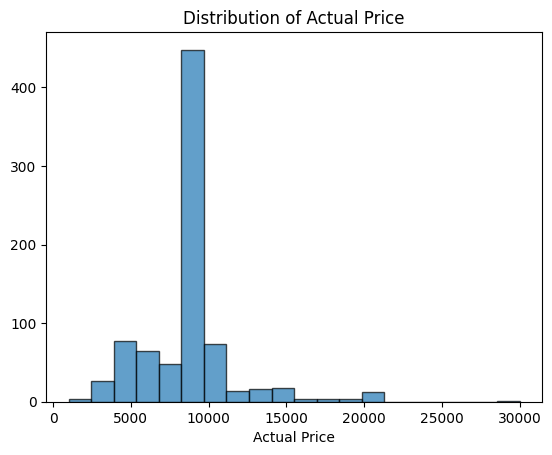

In [14]:
plt.hist(df["Actual Price"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel('Actual Price')
plt.title("Distribution of Actual Price")
plt.show()

A large concentration around 9,000–10,000.A long tail to the right (some drones priced much higher, even close to 30,000).This is a sign of right-skewed distribution (positive skew).

In [15]:
df["Actual Price"].skew()

1.5232860809570283

This highly Right skewed so i try apply log transformation for better result

In [16]:
df['log Actual Price']=np.log1p(df['Actual Price'])

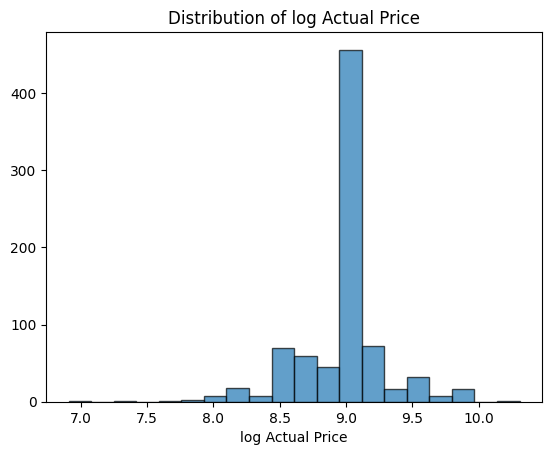

In [17]:
plt.hist(df["log Actual Price"], bins=20, edgecolor="black", alpha=0.7)
plt.title("Distribution of log Actual Price")
plt.xlabel('log Actual Price')
plt.show()

# Data Exploration

## Univariate Analysis

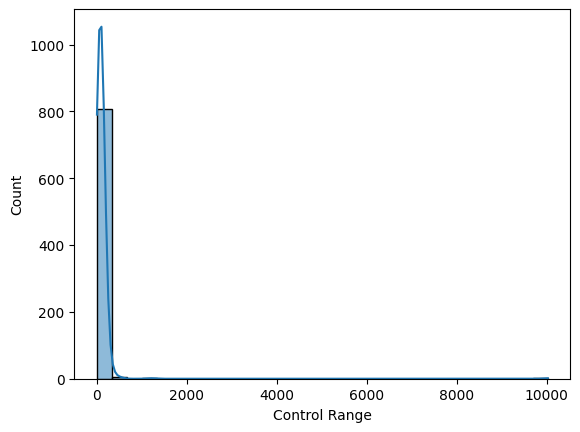

In [18]:
sns.histplot(df["Control Range"], kde=True,bins=30)
plt.show()

Most of the control range concentrated on lower range

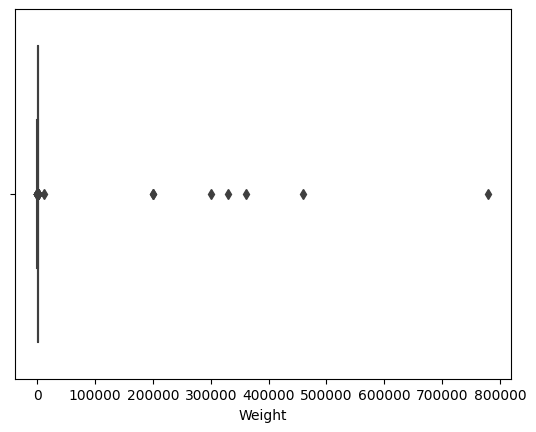

In [19]:
sns.boxplot(x=df["Weight"])
plt.show()

for the weight column, there are outliers (like 800000grams = 800 kg),which is unrealistic.may be dataentry mistake.so it better to drop all the weights greater than 10000.

In [20]:
df = df[df["Weight"] < 10000] 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 0 to 820
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              805 non-null    object 
 1   Type              805 non-null    object 
 2   Control Range     805 non-null    int64  
 3   Battery Type      805 non-null    object 
 4   Weight            805 non-null    int64  
 5   Price             805 non-null    float64
 6   Actual Price      805 non-null    float64
 7   Discount (%)      805 non-null    float64
 8   log Actual Price  805 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 62.9+ KB


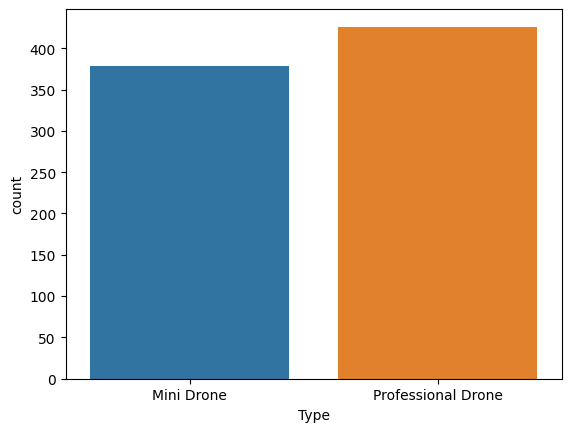

In [22]:
sns.countplot(x="Type", data=df)
plt.show()

It is fairly balanced

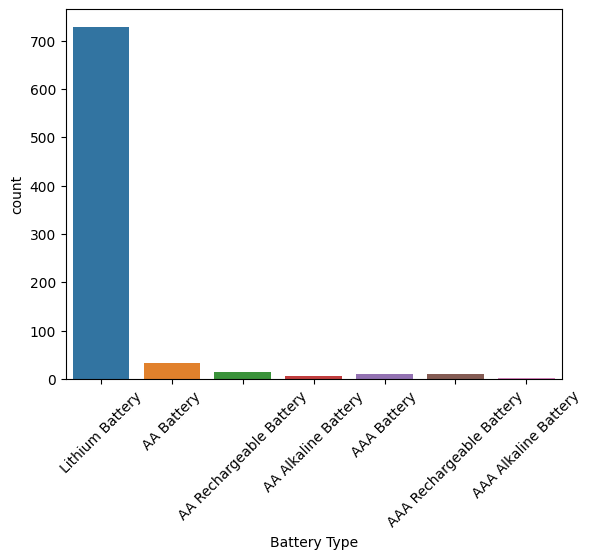

In [23]:
sns.countplot(x="Battery Type", data=df)
plt.xticks(rotation=45)
plt.show()

Mostly used battery type is lithium and before categorical encoding it is better to group them since its count is very low and not more samples to learn.

In [24]:
def simplify_battery(b):
    if b == "Lithium Battery":
        return "Lithium"
    elif "Rechargeable" in b:
        return "Rechargeable"
    elif "Alkaline" in b:
        return "Alkaline"
    else:
        return "Disposable"

df["Battery Type"] = df["Battery Type"].apply(simplify_battery)

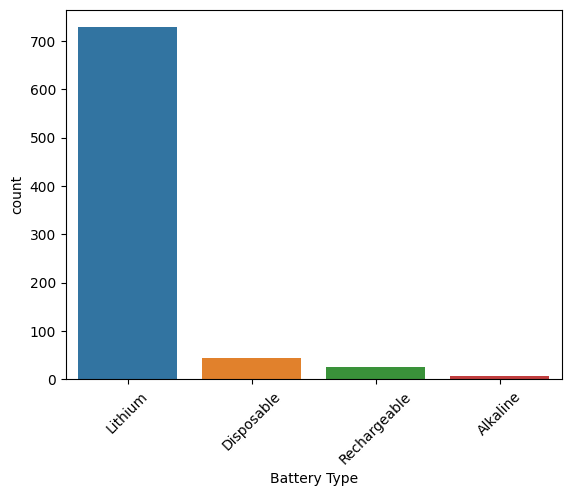

In [25]:
sns.countplot(x="Battery Type", data=df)
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

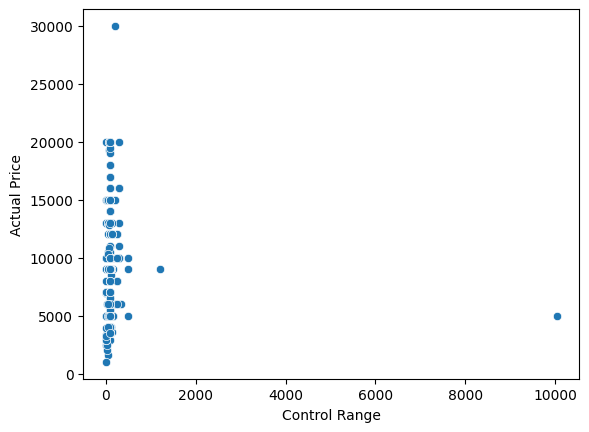

In [26]:
sns.scatterplot(x="Control Range", y="Actual Price", data=df)
plt.show()

Mostly all of the values control range values are concentrated in lower range.only one value Control Range=10000 is an outlier that means it can be distorted the prediction model.so drop it.

only control range have no significance in actual price

In [27]:
df = df[df["Control Range"] != 10000]

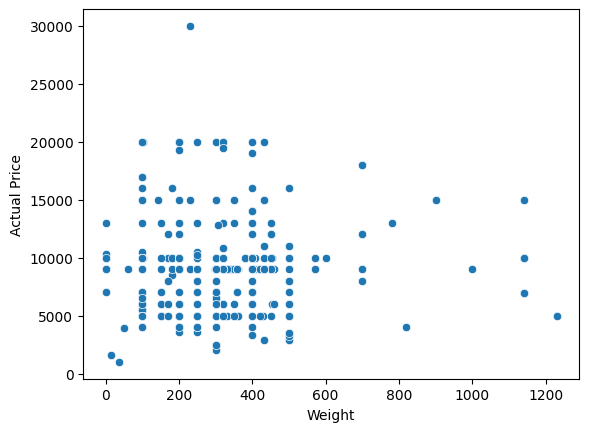

In [28]:
sns.scatterplot(x="Weight", y="Actual Price", data=df)
plt.show()

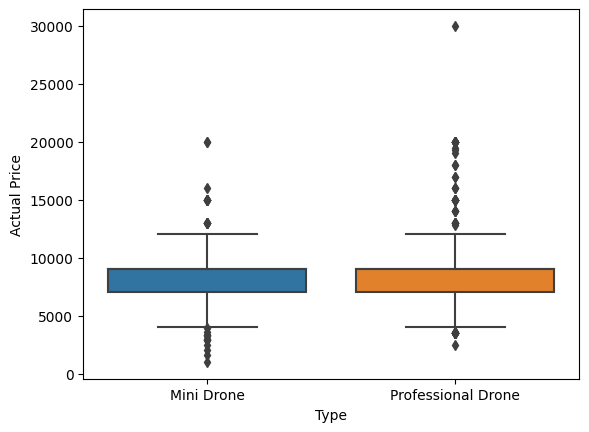

In [29]:
sns.boxplot(x="Type", y="Actual Price", data=df)
plt.show()

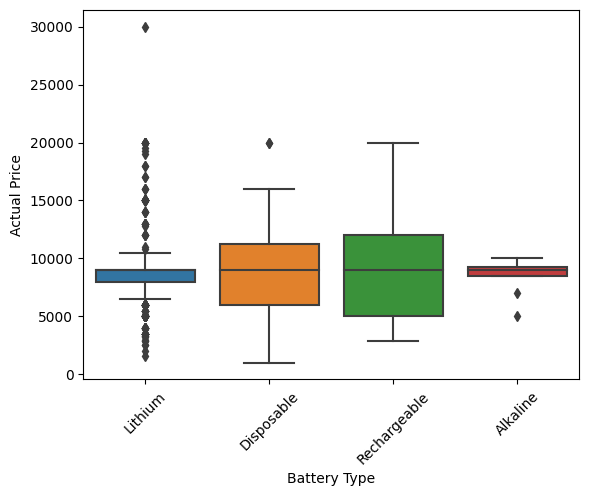

In [30]:
sns.boxplot(x="Battery Type", y="Actual Price", data=df)
plt.xticks(rotation=45)
plt.show()

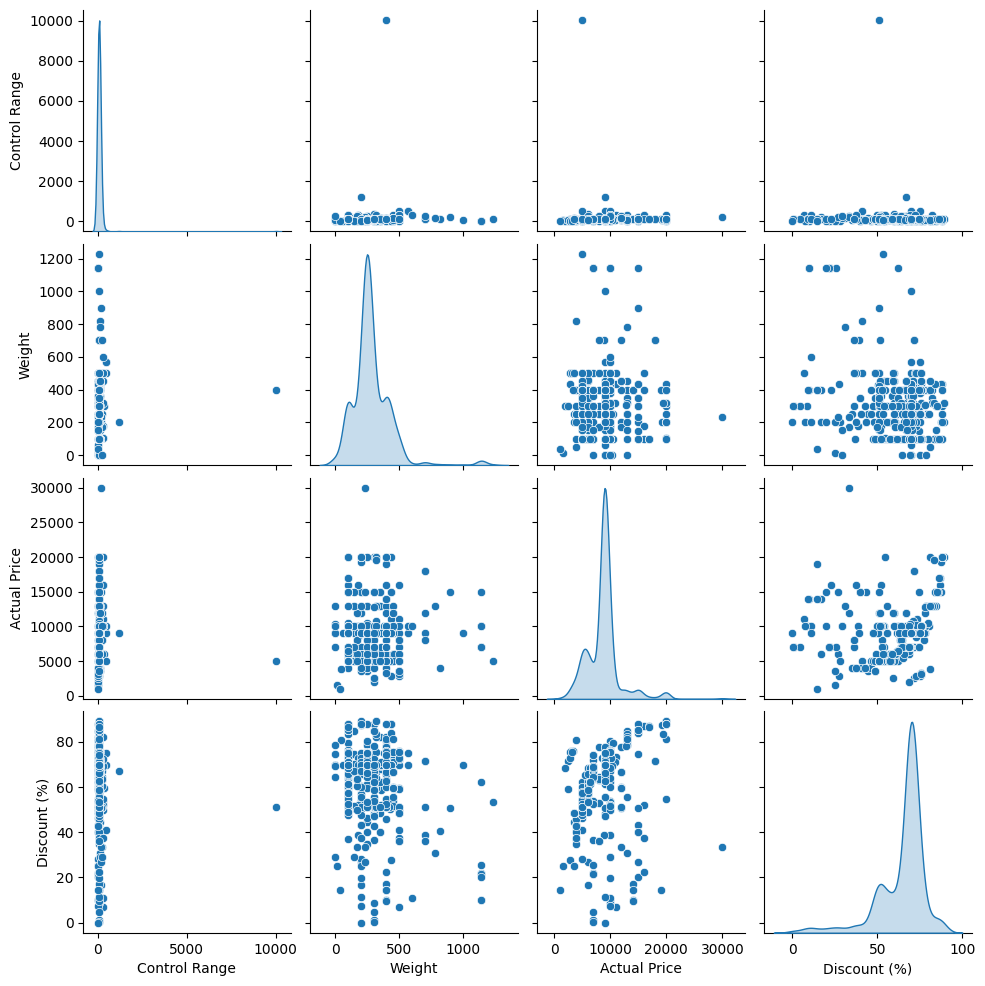

In [31]:
sns.pairplot(df[["Control Range", "Weight", "Actual Price", "Discount (%)"]], diag_kind="kde")
plt.show()

# Predictive Models

## Categorical encoding

In [32]:
df.nunique()

Name                781
Type                  2
Control Range        42
Battery Type          4
Weight               46
Price               231
Actual Price         49
Discount (%)        288
log Actual Price     49
dtype: int64

Type and battery type are low cardinality values

In [33]:
categorical_cols = ["Type", "Battery Type"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

df_numeric= df.drop(columns=categorical_cols)

df= pd.concat([df_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


## Define predictors and target values

In [34]:
df.head()

,Name,Control Range,Weight,Price,Actual Price,Discount (%),log Actual Price,Type_Mini Drone,Type_Professional Drone,Battery Type_Alkaline,Battery Type_Disposable,Battery Type_Lithium,Battery Type_Rechargeable
0,"Zyamalox ZX drone with camera 4k ,12 MP ,fly 3...",40,200,2297.0,4999.0,54.050810,8.517193,1.0,0.0,0.0,0.0,1.0,0.0
1,Fitpro M3 Ultra Beginner Drone 2.4G Mini FPV H...,300,500,10255.0,11000.0,6.772727,9.305741,1.0,0.0,0.0,1.0,0.0,0.0
2,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,102,150,1994.0,5999.0,66.761127,8.699515,0.0,1.0,0.0,0.0,0.0,1.0
3,Orivox A17 Aerial Drone with 4K Dual Camera - ...,50,150,2455.0,4999.0,50.890178,8.517193,1.0,0.0,0.0,0.0,1.0,0.0
4,Orivox M3 Max Mini Drone with Pro Features HD ...,200,200,4998.0,5999.0,16.686114,8.699515,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       805 non-null    object 
 1   Control Range              805 non-null    int64  
 2   Weight                     805 non-null    int64  
 3   Price                      805 non-null    float64
 4   Actual Price               805 non-null    float64
 5   Discount (%)               805 non-null    float64
 6   log Actual Price           805 non-null    float64
 7   Type_Mini Drone            805 non-null    float64
 8   Type_Professional Drone    805 non-null    float64
 9   Battery Type_Alkaline      805 non-null    float64
 10  Battery Type_Disposable    805 non-null    float64
 11  Battery Type_Lithium       805 non-null    float64
 12  Battery Type_Rechargeable  805 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 

In [36]:
X = df.drop(columns=["Name", "Price", "Actual Price",'log Actual Price'])
y = df["log Actual Price"] 

## Split Data in train,test and validation set

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)

## Multi Linear Regression

In [38]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred1_log = lr.predict(X_test)
y_pred1 = np.exp(y_pred1_log)

In [40]:
rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred1))
rmse

2976.328396006959

The model predicts drone prices with an RMSE of 2976.33, which means the predicted prices deviate from the actual prices by about ₹3000 on average. 

## Decision Tree Regression

In [41]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
y_pred2_log = dt.predict(X_test)
y_pred2 = np.exp(y_pred2_log)

rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred2))
rmse

3309.203592974159

> when we moving to decision tree error changes to 2385 . It is not good that much but better than lineatr model

## Random Forest Regression

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
y_pred3_log = rf.predict(X_test)
y_pred3 = np.exp(y_pred3_log)

In [45]:
rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred3))
rmse

1673.6589755564257

> Now it is better than other two models

## Gradient Boosting

In [46]:
gb=XGBRegressor()
gb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred4_log = dt.predict(X_test)
y_pred4 = np.exp(y_pred4_log)

rmse = np.sqrt(mean_squared_error(np.exp(y_test), y_pred4))
rmse

3309.203592974159

> Out of four methods for this problem,random forest regressor is best